题目：寻找关键用户和分析社交关系

data.json 数据描述

1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。

2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。

例如：

节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...

边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

问题

1. 社交网络构建与分析

a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。

b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [10]:
import json

with open(r'D:/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data.get('nodes', [])
edges = data.get('edges', [])

network = {}

for node in nodes:
    user, influence_score = node
    network[user] = {'influence_score': influence_score, 'friends': []}

for edge in edges:
    user1, user2, weight = edge
    network[user1]['friends'].append({'friend': user2, 'weight': weight})
    network[user2]['friends'].append({'friend': user1, 'weight': weight})  

# 找出每个用户的直接朋友列表
direct_friends = {user: [friend['friend'] for friend in network[user]['friends']] for user in network}

print("Social Network (Adjacency List):")
for user, info in network.items():
    print(f"{user} has influence score {info['influence_score']} and friends: {', '.join([f['friend'] for f in info['friends']])}")

print("\nDirect Friends:")
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")


Social Network (Adjacency List):
Yanyan-Wang has influence score 50.95 and friends: Aarebecca, pomelo-nwu, yangzy0603, tyn1998, yvonneyx, lidongze0629, RackweLLizm, yikenie, yubo0923, Maple0817, wj23027, frank-zsy, andyhuang18, bifenglin
Aarebecca has influence score 23.82 and friends: Yanyan-Wang, pomelo-nwu, yangzy0603, yvonneyx, lidongze0629, tyn1998, RackweLLizm, yikenie, yubo0923, Maple0817, frank-zsy
pomelo-nwu has influence score 22.36 and friends: Yanyan-Wang, Aarebecca, yangzy0603, tyn1998, lidongze0629, yvonneyx, RackweLLizm, yikenie, bifenglin, frank-zsy, yubo0923, wj23027, andyhuang18, Maple0817, will-ww, zhicheng-ning, PureNatural, xiaoya-yaya, xgdyp, longyanz, Zzzzzhuzhiwei, birdflyi, lhbvvvvv, zhaosj975
tyn1998 has influence score 16.64 and friends: andyhuang18, pomelo-nwu, frank-zsy, wj23027, bifenglin, Yanyan-Wang, will-ww, Zzzzzhuzhiwei, lhbvvvvv, zhicheng-ning, PureNatural, yangzy0603, xgdyp, stevending1st, wxharry, Aarebecca, birdflyi, xiaoya-yaya, pranavshuklaa, li

2. 统计与度中心性分析

a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。

b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。

c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [11]:
import json

with open(r'D:/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data.get('nodes', [])
edges = data.get('edges', [])

network = {}

for user, influence_score in nodes:
    network[user] = {'influence_score': influence_score, 'friends': []}

for user1, user2, weight in edges:
    if user1 not in network:
        network[user1] = {'influence_score': None, 'friends': []}
    if user2 not in network:
        network[user2] = {'influence_score': None, 'friends': []}
    
    network[user1]['friends'].append({'friend': user2, 'weight': weight})
    network[user2]['friends'].append({'friend': user1, 'weight': weight})

# 计算每个用户的度数（即直接朋友数量）
degrees = {user: len(info['friends']) for user, info in network.items()}

top_5_by_degree = sorted(degrees.items(), key=lambda item: item[1], reverse=True)[:5]
print("Top 5 users by degree (number of friends):")
for user, degree in top_5_by_degree:
    print(f"{user}: {degree} friends")

top_5_by_influence = sorted(network.items(), key=lambda item: item[1]['influence_score'], reverse=True)[:5]
print("\nTop 5 users by influence score:")
for user, info in top_5_by_influence:
    print(f"{user}: Influence Score = {info['influence_score']}")

def combined_influence(user_info, degrees):
    influence_score = user_info['influence_score']
    degree = degrees[user]
    return 0.5 * influence_score + 0.5 * degree

combined_influences = {user: combined_influence(info, degrees) for user, info in network.items()}
top_5_combined = sorted(combined_influences.items(), key=lambda item: item[1], reverse=True)[:5]
print("\nTop 5 users by combined influence (50% influence score + 50% number of friends):")
for user, combined_score in top_5_combined:
    print(f"{user}: Combined Influence Score = {combined_score:.2f}")

Top 5 users by degree (number of friends):
tyn1998: 30 friends
frank-zsy: 30 friends
pomelo-nwu: 24 friends
andyhuang18: 23 friends
wj23027: 23 friends

Top 5 users by influence score:
Yanyan-Wang: Influence Score = 50.95
Aarebecca: Influence Score = 23.82
pomelo-nwu: Influence Score = 22.36
tyn1998: Influence Score = 16.64
frank-zsy: Influence Score = 15.8

Top 5 users by combined influence (50% influence score + 50% number of friends):
Yanyan-Wang: Combined Influence Score = 40.48
Aarebecca: Combined Influence Score = 26.91
pomelo-nwu: Combined Influence Score = 26.18
tyn1998: Combined Influence Score = 23.32
frank-zsy: Combined Influence Score = 22.90


3. 推荐新朋友

a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。

b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。


In [1]:
import json
from collections import defaultdict

with open(r'D:/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data.get('nodes', [])
edges = data.get('edges', [])

network = {}

for user, influence_score in nodes:
    network[user] = {'influence_score': influence_score, 'friends': []}

for user1, user2, weight in edges:
    if user1 not in network:
        network[user1] = {'influence_score': None, 'friends': []}
    if user2 not in network:
        network[user2] = {'influence_score': None, 'friends': []}
    
    network[user1]['friends'].append({'friend': user2, 'weight': weight})
    network[user2]['friends'].append({'friend': user1, 'weight': weight})

yanyan_wang = 'Yanyan-Wang'
direct_friends_of_yanyan = set([friend['friend'] for friend in network[yanyan_wang]['friends']])

# 找出“朋友的朋友”中最有可能成为新朋友的用户
friends_of_friends = {}
for friend in network[yanyan_wang]['friends']:
    for fof in network[friend['friend']]['friends']:
        if fof['friend'] != yanyan_wang and fof['friend'] not in direct_friends_of_yanyan:
            if fof['friend'] not in friends_of_friends:
                friends_of_friends[fof['friend']] = {'common_friends': 0, 'total_weight': 0}
            friends_of_friends[fof['friend']]['common_friends'] += 1
            friends_of_friends[fof['friend']]['total_weight'] += fof['weight']

recommended_friends = sorted(friends_of_friends.items(), key=lambda item: (item[1]['common_friends'], item[1]['total_weight']), reverse=True)

print("Recommended new friends for Yanyan-Wang:")
for user, info in recommended_friends[:5]:  # 只显示前5个推荐
    print(f"{user}: {info['common_friends']} common friends with total connection weight {info['total_weight']:.2f}")

# 找出与 Yanyan-Wang 连接强度最高的5个用户
connection_strength = defaultdict(float)
for user, info in network.items():
    if user == yanyan_wang:
        continue
    
    if user in direct_friends_of_yanyan:
        for friend in network[yanyan_wang]['friends']:
            if friend['friend'] == user:
                connection_strength[user] = friend['weight']
                break
    else:
        total_weight = 0
        num_common_friends = 0
        for friend in network[yanyan_wang]['friends']:
            if user in [f['friend'] for f in network[friend['friend']]['friends']]:
                for fof in network[friend['friend']]['friends']:
                    if fof['friend'] == user:
                        total_weight += fof['weight']
                        num_common_friends += 1
                        break
        if num_common_friends > 0:
            connection_strength[user] = total_weight / num_common_friends

top_connections = sorted(connection_strength.items(), key=lambda item: item[1], reverse=True)[:5]

print("\nTop 5 users by connection strength with Yanyan-Wang:")
for user, strength in top_connections:
    print(f"{user}: Connection Strength = {strength:.2f}")

Recommended new friends for Yanyan-Wang:
will-ww: 6 common friends with total connection weight 47.81
zhicheng-ning: 6 common friends with total connection weight 36.90
Zzzzzhuzhiwei: 6 common friends with total connection weight 34.58
PureNatural: 6 common friends with total connection weight 30.76
lhbvvvvv: 6 common friends with total connection weight 29.90

Top 5 users by connection strength with Yanyan-Wang:
Aarebecca: Connection Strength = 25.30
pomelo-nwu: Connection Strength = 25.09
yangzy0603: Connection Strength = 11.85
tyn1998: Connection Strength = 9.62
will-ww: Connection Strength = 7.97


4. 网络图的可视化

a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。

b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

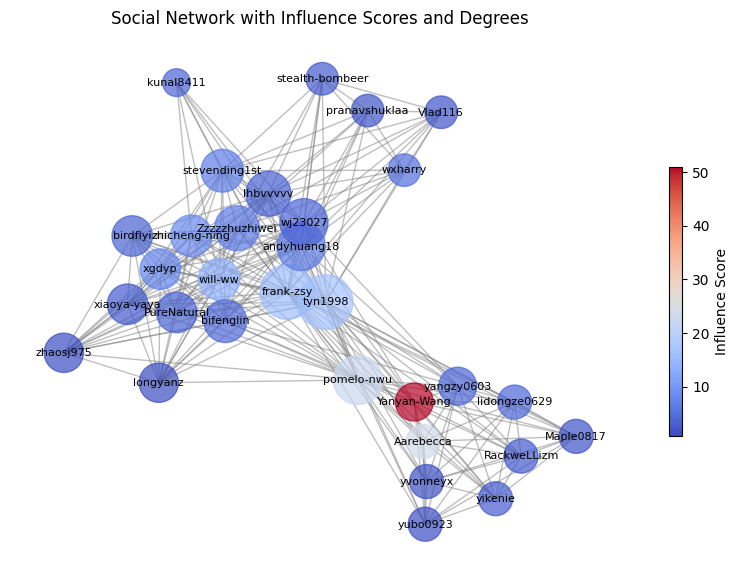

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

with open(r'D:/hw4_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data.get('nodes', [])
edges = data.get('edges', [])

network = {}
for user, influence_score in nodes:
    network[user] = {'influence_score': influence_score, 'friends': []}

for user1, user2, weight in edges:
    if user1 not in network:
        network[user1] = {'influence_score': None, 'friends': []}
    if user2 not in network:
        network[user2] = {'influence_score': None, 'friends': []}
    
    network[user1]['friends'].append({'friend': user2, 'weight': weight})
    network[user2]['friends'].append({'friend': user1, 'weight': weight})

G = nx.Graph()

for user, info in network.items():
    G.add_node(user, influence_score=info['influence_score'])

for user1, user2, weight in edges:
    G.add_edge(user1, user2, weight=weight)

degrees = dict(G.degree())

influence_scores = [info['influence_score'] for _, info in network.items() if info['influence_score'] is not None]
min_influence = min(influence_scores)
max_influence = max(influence_scores)

norm = Normalize(vmin=min_influence, vmax=max_influence)
cmap = plt.cm.coolwarm
mappable = ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array([])  

fig, ax = plt.subplots(figsize=(10, 7))

node_colors = [mappable.to_rgba(info['influence_score']) if info['influence_score'] is not None else 'gray' for _, info in network.items()]

node_sizes = [degrees[node] * 50 + 50 for node in G.nodes]

pos = nx.spring_layout(G, seed=42)  
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.7, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', ax=ax)

plt.colorbar(mappable, ax=ax, shrink=0.5).set_label('Influence Score')

plt.title("Social Network with Influence Scores and Degrees")
plt.axis('off')
plt.show()